janomeについて

https://note.nkmk.me/python-janome-tutorial/

globについて

https://techacademy.jp/magazine/18928

In [1]:
from janome.tokenizer import Tokenizer
import re
import glob##パス名を取得

In [2]:
##ほんとは　序章部分も回すべき
no_zero = glob.glob("アルマーク/序章/*") 
no_zero

['アルマーク/序章/N9407FU-5.txt',
 'アルマーク/序章/N9407FU-4.txt',
 'アルマーク/序章/N9407FU-3.txt',
 'アルマーク/序章/N9407FU-2.txt',
 'アルマーク/序章/N9407FU-1.txt']

In [3]:
## transer用
no_zero =  ["Transer/N7235FU-8.txt"]

In [3]:
lines = open(no_zero[4],"r",encoding="utf-8")

#\n を削除した文章化(\u3000 は全角空白？) はしない
lines = lines.read()##re.sub(r"[akira]","",text.read())
        
t = Tokenizer()
streams = [print(token) for token in t.tokenize(lines)]

よろしく	副詞,一般,*,*,*,*,よろしく,ヨロシク,ヨロシク
お願い	名詞,サ変接続,*,*,*,*,お願い,オネガイ,オネガイ
いたし	動詞,非自立,*,*,五段・サ行,連用形,いたす,イタシ,イタシ
ます	助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス
。	記号,句点,*,*,*,*,。,。,。

	記号,空白,*,*,*,*,
,*,*
********************************************	名詞,サ変接続,*,*,*,*,********************************************,*,*

	記号,空白,*,*,*,*,
,*,*
北	名詞,一般,*,*,*,*,北,キタ,キタ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
傭兵	名詞,一般,*,*,*,*,傭兵,ヨウヘイ,ヨーヘイ


	記号,空白,*,*,*,*,

,*,*
　	記号,空白,*,*,*,*,　,　,
 	記号,空白,*,*,*,*, ,*,*
アル	名詞,固有名詞,人名,名,*,*,アル,アル,アル
マーク	名詞,サ変接続,*,*,*,*,マーク,マーク,マーク
の	助詞,連体化,*,*,*,*,の,ノ,ノ
ノルク	名詞,一般,*,*,*,*,ノルク,*,*
魔法	名詞,一般,*,*,*,*,魔法,マホウ,マホー
学院	名詞,一般,*,*,*,*,学院,ガクイン,ガクイン
入学	名詞,サ変接続,*,*,*,*,入学,ニュウガク,ニューガク
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
二	名詞,数,*,*,*,*,二,ニ,ニ
年	名詞,接尾,助数詞,*,*,*,年,ネン,ネン
遅れ	動詞,自立,*,*,一段,連用形,遅れる,オクレ,オクレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
。	記号,句点,*,*,*,*,。,。,。



	記号,空白,*,*,*,*,


,*,*
　	記号,空白,*,*,*,*,　,　,
中原	名詞,固有名詞,人名,姓,*,*,中原,ナカハラ,ナカハラ
、	記号,読点,*,*,*,*,、,、,、
南方	名詞,一般,*,*,*,*,南方,ナンポウ,ナンポー
で	助詞,格助詞,一般,*,*,*,で,デ,デ
戦乱	名詞,一般,*,*

In [4]:
import collections
def parse_voc(text):
    ##助動詞 or 助詞 + 別の品詞 + 、。 が来るまで合体させる
    vocs = []
    voc = ""##vocを合体させる部分
    before_voc = ""##前回のvoc字ズラのまま
    before_nomal_voc = ""##前回のvoc言い切り型
    before_word_type = ""
    remove = ["助動詞","助詞"]
    split_norm = ["数","代名詞"]##名刺でも取り除く(分解する分類)                #\u3000は全角空白?
    split_symbol = ["、","。","(",")","「","」","　'","’","'",'"',"&","quot",";","“","『","』","[","]","「&"]##記号は含めないが、ここで上手に分解する  "がなぜか &quot; になる

    for token in t.tokenize(text):#[”。”]は無理矢理処理数を増やすため
        ##print(token)
        now_word_type = token.part_of_speech.split(",")[0]
        
        ##助詞・助動詞の処理 + 、。の処理 + 改行や空白(\u3000)の時の処理
        if now_word_type in remove or token.surface in split_symbol or token.part_of_speech.split(",")[1] == "空白":
            voc += before_nomal_voc##動詞を切りのいい形で代入
            if voc:##空語(助詞・助動詞で生まれる)を取り除く
                vocs.append(voc)
            voc = ''
            before_word_type = ""
            before_nomal_voc = ""
        
        ##前回と同じ品詞 = 分割ミス として一つ前の変換値を繋げる + 名詞-数字の連鎖を断つための処理(この時、前が接頭辞かを確認すべき)
        elif before_word_type == "接頭詞" or (before_word_type == now_word_type and token.part_of_speech.split(",")[1] not in split_norm):
            voc += before_voc
            ##初期化
            before_voc = token.surface ##今の単語の字ズラままを入れる
            before_nomal_voc = token.base_form ##今の単語を読み切りの形に
            before_word_type = now_word_type##品詞変更
        else:
            voc += before_nomal_voc
            ##空語(助詞・助動詞で生まれる)を取り除く 
            if voc:
                vocs.append(voc)##前回までの単語を追加
                voc=""
            
            ##初期化
            before_voc = token.surface ##今の単語の字ズラままを入れる
            before_nomal_voc = token.base_form ##今の単語を読み切りの形に
            before_word_type = now_word_type##品詞変更
            
    ##集めた単語を返す
    return vocs

#c = collections.Counter(vocs)
#c

In [7]:
def concat_voc(dir_name):
    file_names = glob.glob(dir_name+"/*")
    voc_list = []
    
    ##print(file_names)
    for file_name in file_names:
        with open(file_name,"r",encoding="utf-8") as f:
            file = f.read()
            ##あとがき部分を見つける
            end = file.find("************************************************")
            ##前書き部分を見つける
            start = file.find("********************************************")
            
            ##前書きがない場合
            if start == end:
                start = 0
            ##あとがきがない場合
            if end == -1:
                end = len(file)-1
            
            ##あとがき, 前書きの削除
            file = file[start:end]
            
            ##題名以降の部分を見つける
            main_start = file.find("\n")
            ##print(file)
            voc_list += parse_voc(file[main_start:])
        
    return voc_list

### WordCloud
https://qiita.com/Senple/items/1ad08b1a7ac9560bef62

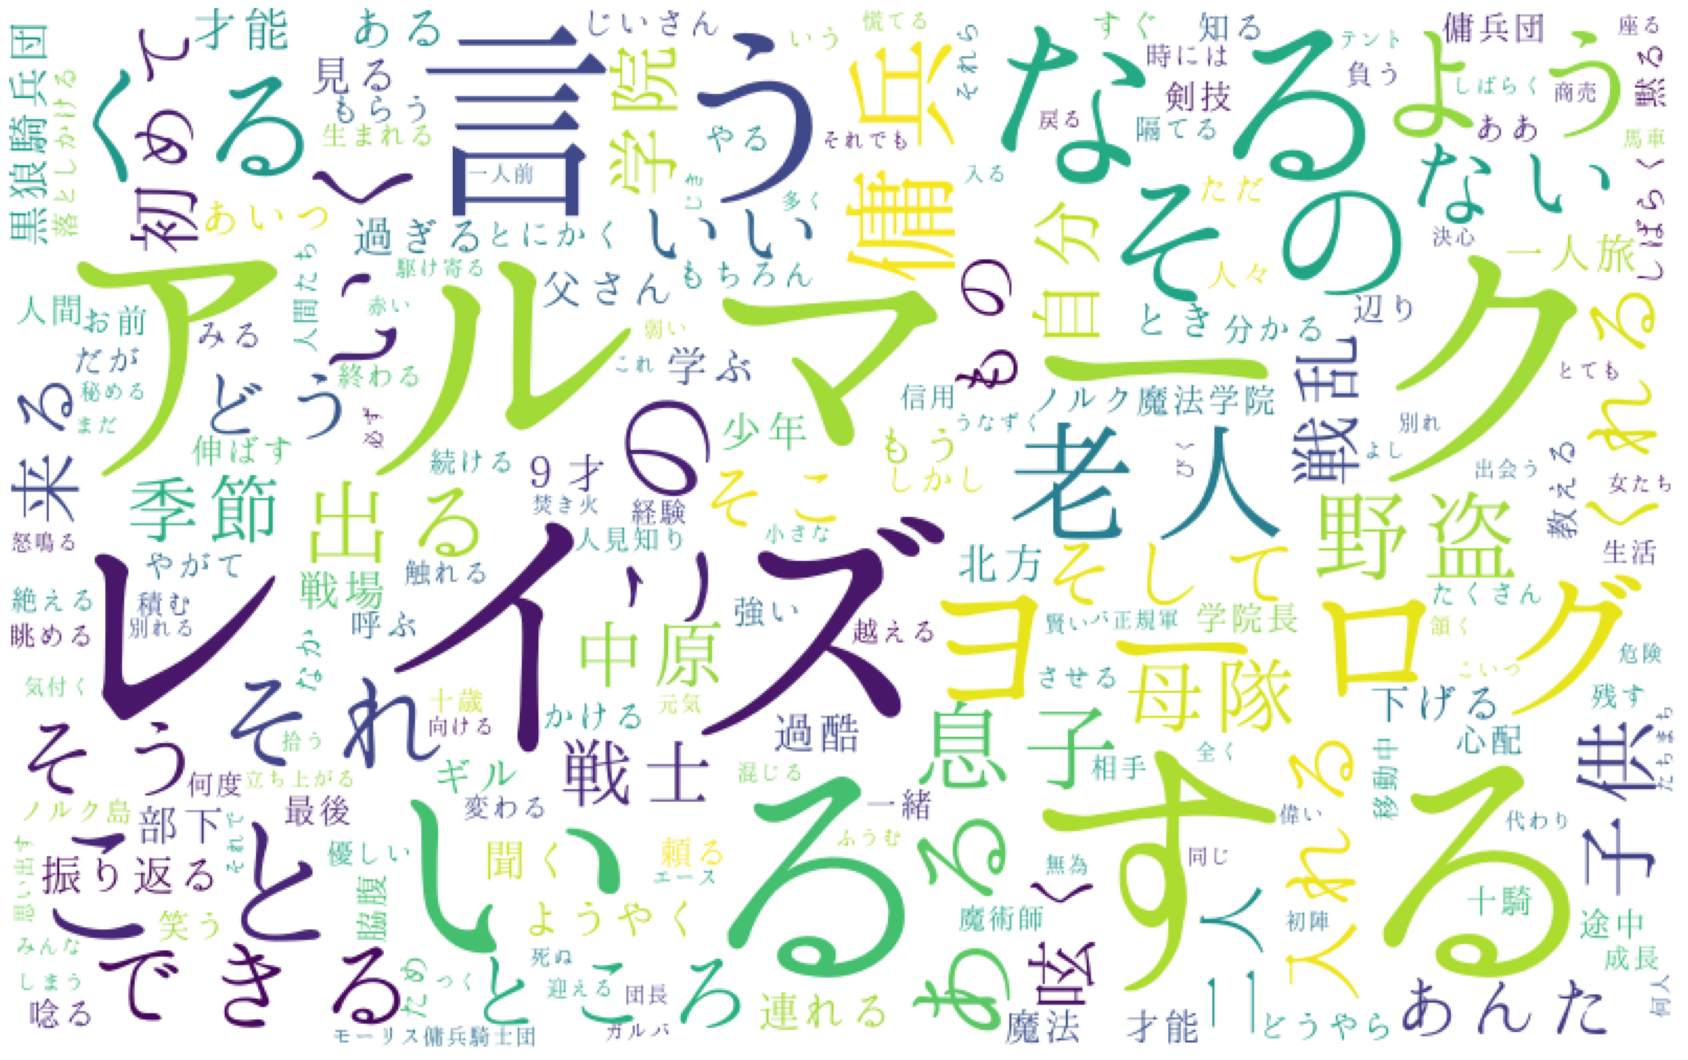

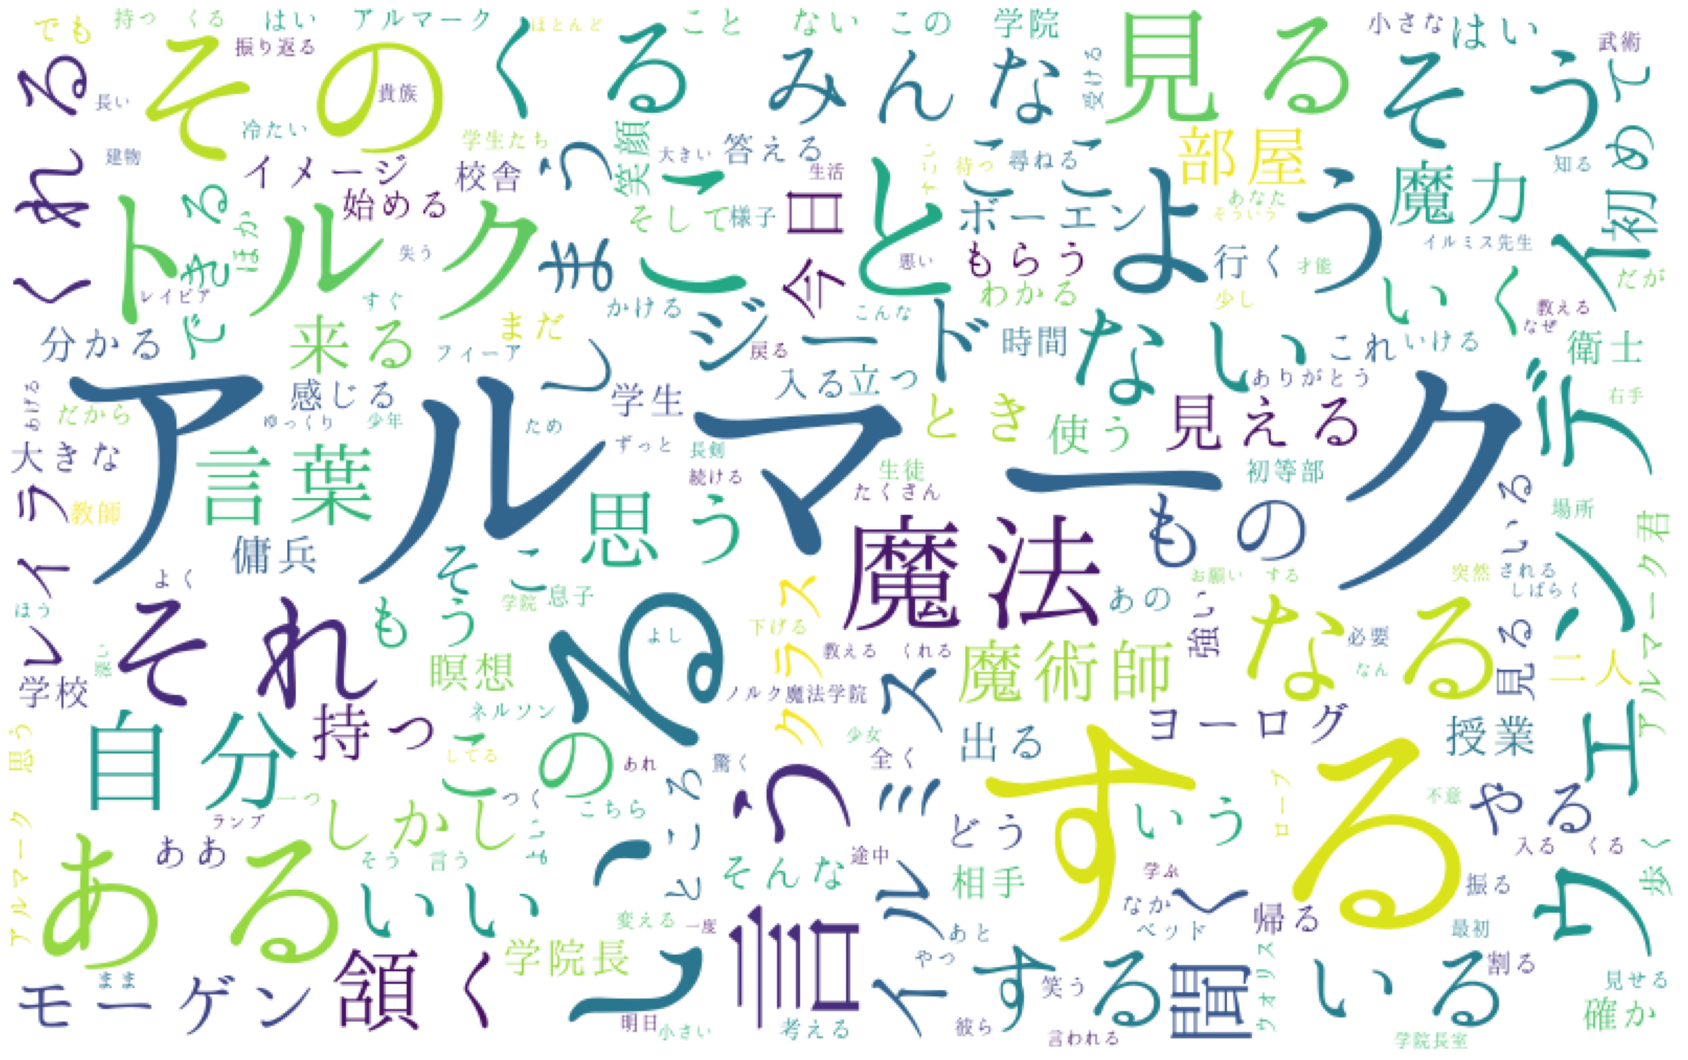

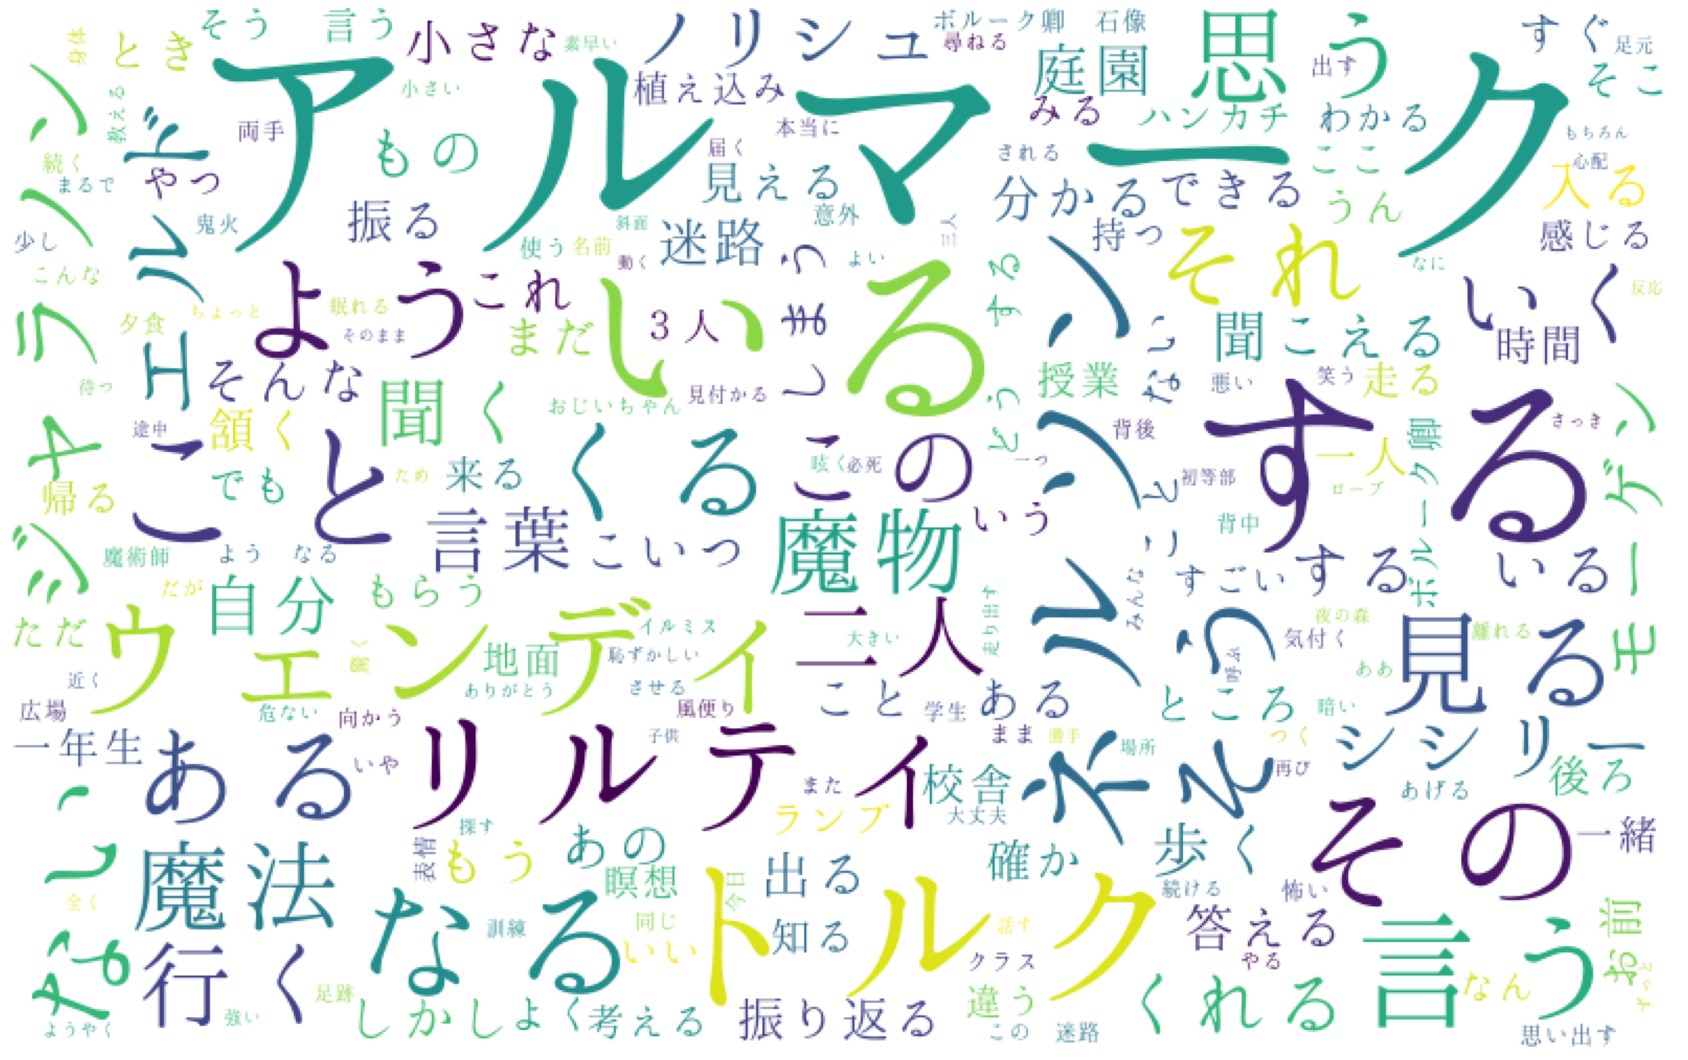

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fpath = "hannari/Hannari.otf"##日本語文字化けを防ぐ(ダウンロードしたもの)

##フォルダ(章)ごとのlistを生成
chapter_folders = glob.glob("アルマーク/*")
voc_lists= []
for chapter_folder_name in chapter_folders:
    voc_list = concat_voc(chapter_folder_name)
    voc_lists.append(voc_list)
    c = collections.Counter(voc_list)
    
    words = ""
    for word in voc_list:
        words = words + " " + word
        
    
    wordcloud =  WordCloud(background_color="white",
                           font_path=fpath,
                           width=800,
                           height=500).generate(words)
    ##WordCloudの表示
    plt.figure(figsize=(30,24))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    #print(c)
    #print("\n\n")

In [15]:
pip install wordcloud

     |████████████████████████████████| 160 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.4 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 4.4 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [13]:
[print(token) for token in t.tokenize(u"予想通りアルマーク")]

予想	名詞,サ変接続,*,*,*,*,予想,ヨソウ,ヨソー
通り	名詞,接尾,一般,*,*,*,通り,ドオリ,ドーリ
アル	名詞,固有名詞,人名,名,*,*,アル,アル,アル
マーク	名詞,サ変接続,*,*,*,*,マーク,マーク,マーク


[None, None, None, None]